In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
matches = pd.read_csv("matches_two.csv")

In [111]:
matches.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2022-08-13,21:00,La Liga,Matchweek 1,Sat,Home,D,0.0,0.0,...,Match Report,NaN,21.0,5.0,17.0,1.0,0.0,0.0,2023,Barcelona
1,1,2022-08-21,22:00,La Liga,Matchweek 2,Sun,Away,W,4.0,1.0,...,Match Report,NaN,15.0,7.0,14.6,0.0,0.0,0.0,2023,Barcelona
2,2,2022-08-28,19:30,La Liga,Matchweek 3,Sun,Home,W,4.0,0.0,...,Match Report,NaN,24.0,9.0,14.4,1.0,0.0,0.0,2023,Barcelona
3,3,2022-09-03,21:00,La Liga,Matchweek 4,Sat,Away,W,3.0,0.0,...,Match Report,NaN,18.0,5.0,16.0,2.0,0.0,0.0,2023,Barcelona
4,5,2022-09-10,18:30,La Liga,Matchweek 5,Sat,Away,W,4.0,0.0,...,Match Report,NaN,16.0,8.0,14.9,0.0,0.0,0.0,2023,Barcelona


In [112]:
#We don't need the 'unamed:0' column so we'll drop it
matches.drop('Unnamed: 0', axis=1, inplace=True)

In [113]:
matches.shape

(4322, 27)

In [114]:
print(matches.columns)
print(matches.index)

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team'],
      dtype='object')
RangeIndex(start=0, stop=4322, step=1)


In [115]:
matches.describe().T

,count,mean,std,min,25%,50%,75%,max
gf,4322.0,1.269088,1.177594,0.0,0.0,1.0,2.0,8.0
ga,4322.0,1.269088,1.177594,0.0,0.0,1.0,2.0,8.0
xg,4322.0,1.276377,0.770913,0.0,0.7,1.1,1.7,5.6
xga,4322.0,1.276377,0.770913,0.0,0.7,1.1,1.7,5.6
poss,4322.0,50.000925,11.197786,18.0,42.0,50.0,58.0,82.0
attendance,3346.0,26815.921100,18924.324548,13.0,13247.0,19161.0,37972.0,97939.0
notes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sh,4322.0,11.491439,4.677475,0.0,8.0,11.0,14.0,36.0
sot,4322.0,3.798473,2.261921,0.0,2.0,3.0,5.0,17.0
dist,4320.0,18.362986,3.376990,4.8,16.1,18.2,20.2,46.2


`Observations`
We can tell the average goals per game is 1 which indicates not many goals are scored in the matches. The goals scored ranges from 0 to 8. Average shots attempted per game is about 11 but average shots on target is about 4 which indicates that in this League, many shots doesn't get converted into goals. Minimum attendance at a game was 13 which is way below the standard capacity of a stadium. I'm pretty sure this will be coming from the 2019/2020 during the Covid-19 pandemic when spectators were banned from attending matches at some point so that makes sense. We can also see a lot of shots are being taken 18 yards away which is expected. The 18 yard box is usually heavily guarded by defenders of the opposition which makes it difficult to penetrate so most players who want to score will attempt to shoot from 18 years way which explains why the average distance is 18 yards. On rare occassions do players have the priviledge to shoot from less than 18 yards like you can see min distance is 4.8 yards and we can see some ambitious attempts at goal from 46 yards away.

In [116]:
matches['team'].value_counts()

Barcelona              216
Getafe                 216
Atletico Madrid        216
Real Sociedad          216
Real Betis             216
Villarreal             216
Athletic Club          216
Valencia               216
Celta Vigo             216
Real Madrid            216
Sevilla                216
Alaves                 190
Levante                190
Espanyol               178
Eibar                  152
Osasuna                141
Valladolid             140
Granada                114
Leganes                114
Mallorca               103
Cadiz                  102
Elche                  102
Girona                 102
Rayo Vallecano         102
Huesca                  76
Deportivo La Coruna     38
Las Palmas              38
Malaga                  38
Almeria                 26
Name: team, dtype: int64

`NOTE`

There are 20 teams participating in the League per season/year. It's round robin and each team gets to host their opponent so teams play each other twice. This means each team has 19*2 ie 38 games per season. We have 6 seasons of data so ideally each club should have 226 (38 * 6) games in our sampled data set. The current 2023 season is still ongoing. As at the time of this analysis, 26 matches have been played per team so far which explains why we're seeing 216 instead of 226. we can see, 11 teams have 216 games over the 6 seasons which means they have played the maximum number of matches over the 6 seasons. <br>

In the La Liga, at the end of every season, 4 teams at the bottom of the league gets relegated to a lower division meaning they won't be participating in the next season's competition. These 4 teams get replaced with another set of 4 teams who have been promoted from the lower division. This is why our list of teams above is 29 instead of 20. Only if they perform well in the lower division do they get to be promoted to to participate in the next season of the competition. This explains why some teams have lower than 216 matches over the 6 seasons we have sampled. For instance, Almeria has 26 matches only meaning they haven't participated in the last 5 seasons of the La Liga. Deportivo La Coruna, Las Palmas, Malaga has 38 matches meaning they have participated in a previous season and but not the current one. Huesca has 76 matches meaning they have participated in two of the last 6 seasons. Cadiz, Elche, Girona has 102 matches because they are currently in the ongoing season with 26 matches and participated in 2 of the previous 5 seasons as well - ((38 * 2) + 26 ). <br>

Now we know why we have more than than 20 unique teams in our sample and why we're missing match data for some of the teams.





In [117]:
matches['season'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018], dtype=int64)

In [118]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          4322 non-null   object 
 1   time          4322 non-null   object 
 2   comp          4322 non-null   object 
 3   round         4322 non-null   object 
 4   day           4322 non-null   object 
 5   venue         4322 non-null   object 
 6   result        4322 non-null   object 
 7   gf            4322 non-null   float64
 8   ga            4322 non-null   float64
 9   opponent      4322 non-null   object 
 10  xg            4322 non-null   float64
 11  xga           4322 non-null   float64
 12  poss          4322 non-null   float64
 13  attendance    3346 non-null   float64
 14  captain       4322 non-null   object 
 15  formation     4322 non-null   object 
 16  referee       4322 non-null   object 
 17  match report  4322 non-null   object 
 18  notes         0 non-null    

Most of the columns are not in the correct datatype so we'll convert them. Also, we're create new columns. <br>
1. venue_code -> 1 for home and 0 for away. match outcomes can be influenced by whether you're a visitor or host. <br>
2. opp_code -> each opponent will have a unique number. <br>
3. hour -> we'll extract the hour from time. maybe some teams play better at some times. <br>
3. day_code -> creates categorical values for days of the week. Monday=0, Sunday=6 <br>
4. target -> this is what we want to predict. <br>


In [119]:
matches["date"] = pd.to_datetime(matches["date"])
matches['venue_code'] = matches['venue'].astype("category").cat.codes
matches["opp_code"] = matches["opponent"].astype("category").cat.codes
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")
matches['day_code'] = matches["date"].dt.dayofweek
#matches["result"].unique()
matches['target'] = matches["result"].astype("category").cat.codes 


In [120]:
matches['target'].unique()

array([0, 2, 1], dtype=int8)

In [121]:
matches['day_code'].unique()

array([5, 6, 3, 1, 2, 0, 4], dtype=int64)

In [16]:
matches.opp_code.unique()

array([22, 24, 27, 25,  7,  9, 19,  6, 23, 28,  2, 26,  1, 21, 10,  3, 11,
       12,  5,  4,  0, 18, 13, 14,  8, 17, 16, 20, 15], dtype=int8)

In [122]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
0,2022-08-13,21:00,La Liga,Matchweek 1,Sat,Home,D,0.0,0.0,Rayo Vallecano,...,1.0,0.0,0.0,2023,Barcelona,1,22,21,5,0
1,2022-08-21,22:00,La Liga,Matchweek 2,Sun,Away,W,4.0,1.0,Real Sociedad,...,0.0,0.0,0.0,2023,Barcelona,0,24,22,6,2
2,2022-08-28,19:30,La Liga,Matchweek 3,Sun,Home,W,4.0,0.0,Valladolid,...,1.0,0.0,0.0,2023,Barcelona,1,27,19,6,2
3,2022-09-03,21:00,La Liga,Matchweek 4,Sat,Away,W,3.0,0.0,Sevilla,...,2.0,0.0,0.0,2023,Barcelona,0,25,21,5,2
4,2022-09-10,18:30,La Liga,Matchweek 5,Sat,Away,W,4.0,0.0,Cádiz,...,0.0,0.0,0.0,2023,Barcelona,0,7,18,5,2


target has draw=0, Lose=1, Win=2

In [29]:
matches.isna().sum()

date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       976
captain            0
formation          0
referee            0
match report       0
notes           4322
sh                 0
sot                0
dist               2
fk                 0
pk                 0
pkatt              0
season             0
team               0
venue_code         0
opp_code           0
hour               0
day_code           0
target             0
dtype: int64

In [125]:
matches[matches['attendance'].isnull()]['season'].unique()

array([2021, 2020, 2018], dtype=int64)

Missing data for attendance is coming from the 2020 and 2021 season. This was as a result of restrictions during the Covid-19 pandemic. Spectators were banned from attending games at some point in time.

In [126]:
matches['dist'].fillna(matches['dist'].mean(), inplace=True)

In [127]:
matches.isna().sum()

date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       976
captain            0
formation          0
referee            0
match report       0
notes           4322
sh                 0
sot                0
dist               0
fk                 0
pk                 0
pkatt              0
season             0
team               0
venue_code         0
opp_code           0
hour               0
day_code           0
target             0
dtype: int64

In [92]:
#matches[matches['attendance'] == np.nan]

In [129]:
matches['attendance'].fillna(0, inplace=True)

Text(0.5, 1.0, 'Match Outcomes Overview')

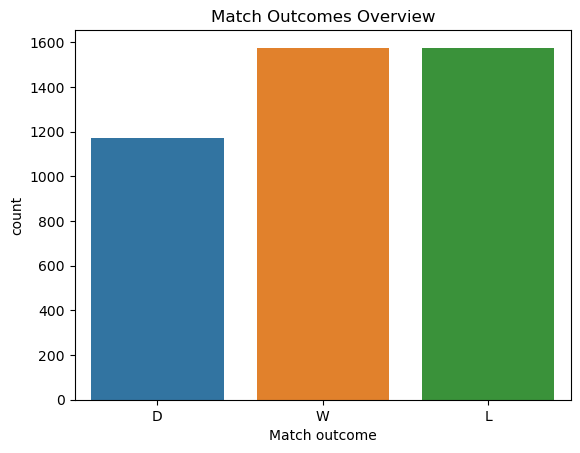

In [131]:
sns.countplot(x=matches['result'])
plt.xlabel('Match outcome')
plt.title("Match Outcomes Overview")

it appears there are as many wins as loses in the dataset about 480 each whiles Draw outcomes was about 350. 

Text(0.5, 1.0, 'Match Frequencies based on days of the week')

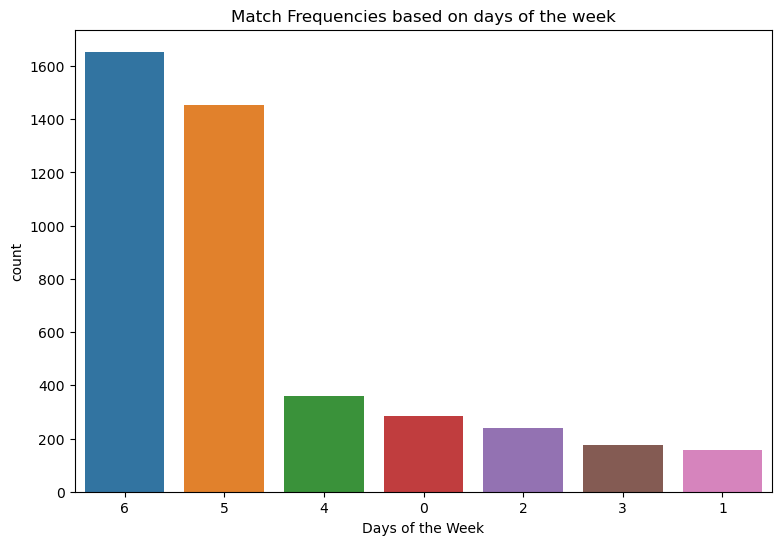

In [132]:
plt.figure(figsize=(9,6))
sns.countplot(matches, x='day_code', order=matches["day_code"].value_counts().index)
#plt.xticks(np.arange(7), ['Monday', "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("Days of the Week")
plt.title("Match Frequencies based on days of the week")

It appears most matches are scheduled on Saturdays and Sundays. <br> let's see the distribution of goals over the two seasons using the the displot

Text(0.5, 1.0, 'Distribution of goals')

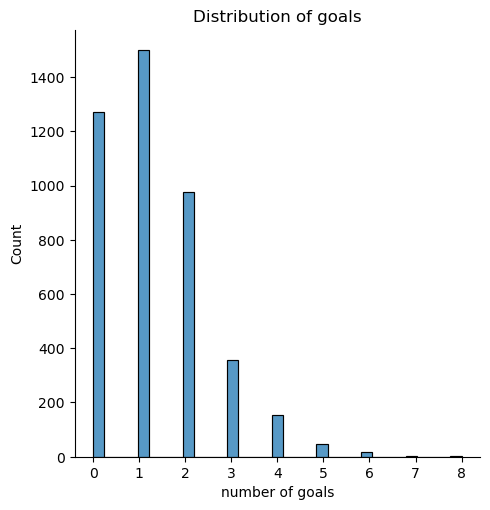

In [133]:
sns.displot(x='gf', data=matches)
plt.xlabel('number of goals')
plt.title('Distribution of goals')

It looks like most matches ends up with single goals or goaless. Rarely does 6 or more goals occur in a match. <br> 
it appears this league doesn't produce a lot of goals.

## The Models

In [134]:
#randomforest can pick up non linear relationship
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=101)

#2022 will be my training dataset and 2023 will be my test dataset.  This is a time series dataset
# according to google search
train = matches[matches['date'] < '2022-01-01']
test = matches[(matches['date'] > '2022-01-01' ) & (matches['date'] <= '2023-01-01')]
val = matches[matches['date'] > '2023-01-01']

In [135]:
predictors = ["venue_code", 'opp_code', 'hour', 'day_code']
rf.fit(train[predictors], train['target'])       # X, y

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=101)

In [136]:
#predictions
y_pred = rf.predict(test[predictors])
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
acc = accuracy_score(test['target'], y_pred)
acc

0.42528735632183906

In [137]:
print(classification_report(test['target'], y_pred))

              precision    recall  f1-score   support

           0       0.28      0.22      0.25       180
           1       0.49      0.53      0.51       258
           2       0.43      0.47      0.45       258

    accuracy                           0.43       696
   macro avg       0.40      0.40      0.40       696
weighted avg       0.42      0.43      0.42       696



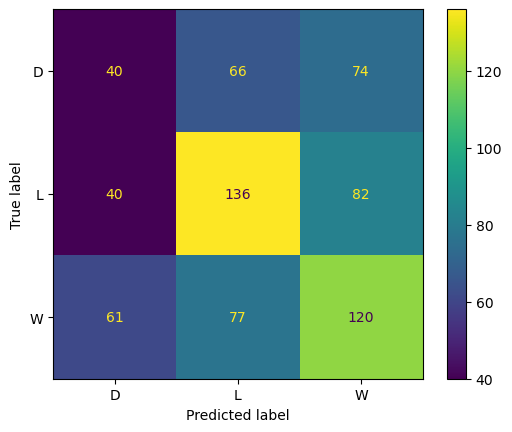

In [138]:
cm = confusion_matrix(test['target'], y_pred)
labels = ['D', 'L', 'W']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

### Let's add some predictors

In [140]:
#added gf, ga, sh, sot
predictors = ["venue_code", 'opp_code', 'hour', 'day_code', 'gf', 'ga', 'sh', 'sot']
rf.fit(train[predictors], train['target'])     

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=101)

In [141]:
#predictions
y_pred = rf.predict(test[predictors])
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
acc = accuracy_score(test['target'], y_pred)
acc

0.9985632183908046

In [142]:
print(classification_report(test['target'], y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       180
           1       1.00      1.00      1.00       258
           2       1.00      1.00      1.00       258

    accuracy                           1.00       696
   macro avg       1.00      1.00      1.00       696
weighted avg       1.00      1.00      1.00       696



The second model with venue, opposition, hour, day_code, goals for, goals against, shot and shots on targets as predictors performed very well ie 100%. <br>
let's test with our validation set. I'll call validation predition y_val_pred

In [144]:
y_val_pred = rf.predict(val[predictors])
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
acc = accuracy_score(val['target'], y_val_pred)
acc

0.9954954954954955

In [146]:
print(classification_report(val['target'], y_val_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.99      0.99        85
           2       1.00      1.00      1.00        85

    accuracy                           1.00       222
   macro avg       0.99      1.00      0.99       222
weighted avg       1.00      1.00      1.00       222



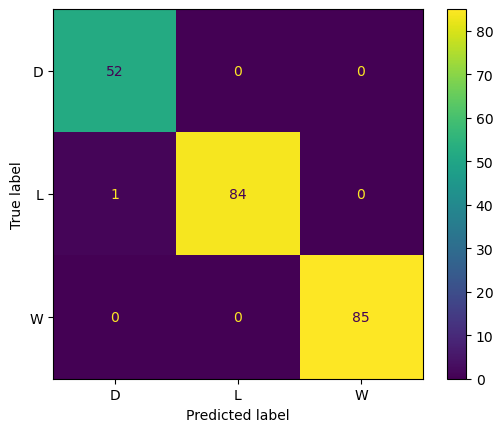

In [147]:
cm = confusion_matrix(val['target'], y_val_pred)
labels = ['D', 'L', 'W']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

`Summary` : There was only one match that was misclassified. A Loss outcome was predicted as a Win. <br>
It looks like our Random Forest Classifier model with venue_code, opp_code, hour, day_code, gf, ga, sh, sot gives the best outcome.

## Trying a Neural Network